In [62]:

import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re


import geopandas as gpd
import plotly.express as px
from shapely.geometry import Point
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns', None)


In [63]:
df = pd.read_csv(r'C:/Users/pclenovo/Documents/Vehicle proyect _3/Electric_Vehicle_Population_Data.csv')
df.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2C4RC1N71H,Kitsap,Bremerton,WA,98311.0,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,23.0,349437882,POINT (-122.6466274 47.6341188),PUGET SOUND ENERGY INC,5.303509e+10
1,2C4RC1N7XL,Stevens,Colville,WA,99114.0,2020,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,7.0,154690532,POINT (-117.90431 48.547075),AVISTA CORP,5.306595e+10
2,KNDC3DLCXN,Yakima,Yakima,WA,98908.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,14.0,219969144,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA0J,Kitsap,Bainbridge Island,WA,98110.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,476786887,POINT (-122.5235781 47.6293323),PUGET SOUND ENERGY INC,5.303509e+10
4,1N4AZ1CP7J,Thurston,Tumwater,WA,98501.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,35.0,201185253,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [64]:
df.tail(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
159462,KM8JBDA2XP,Skamania,Underwood,WA,98651.0,2023,HYUNDAI,TUCSON,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,14.0,235949514,POINT (-121.5312858 45.7348285),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF S...,5.305995e+10
159463,1G1FZ6S02M,Skagit,Bow,WA,98232.0,2021,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,40.0,148544168,POINT (-122.440636 48.5613885),PUGET SOUND ENERGY INC,5.305795e+10
159464,YV4H60CX2P,King,Sammamish,WA,98029.0,2023,VOLVO,XC90,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,5.0,240200754,POINT (-121.9993659 47.5484866),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
159465,5YJ3E1EA7K,Whatcom,Bellingham,WA,98225.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,40.0,156680590,POINT (-122.486115 48.761615),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10
159466,7SAYGDEF6N,Island,Camano Island,WA,98282.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,10.0,208285619,POINT (-122.5310901 48.2192797),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.302997e+10


In [65]:
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

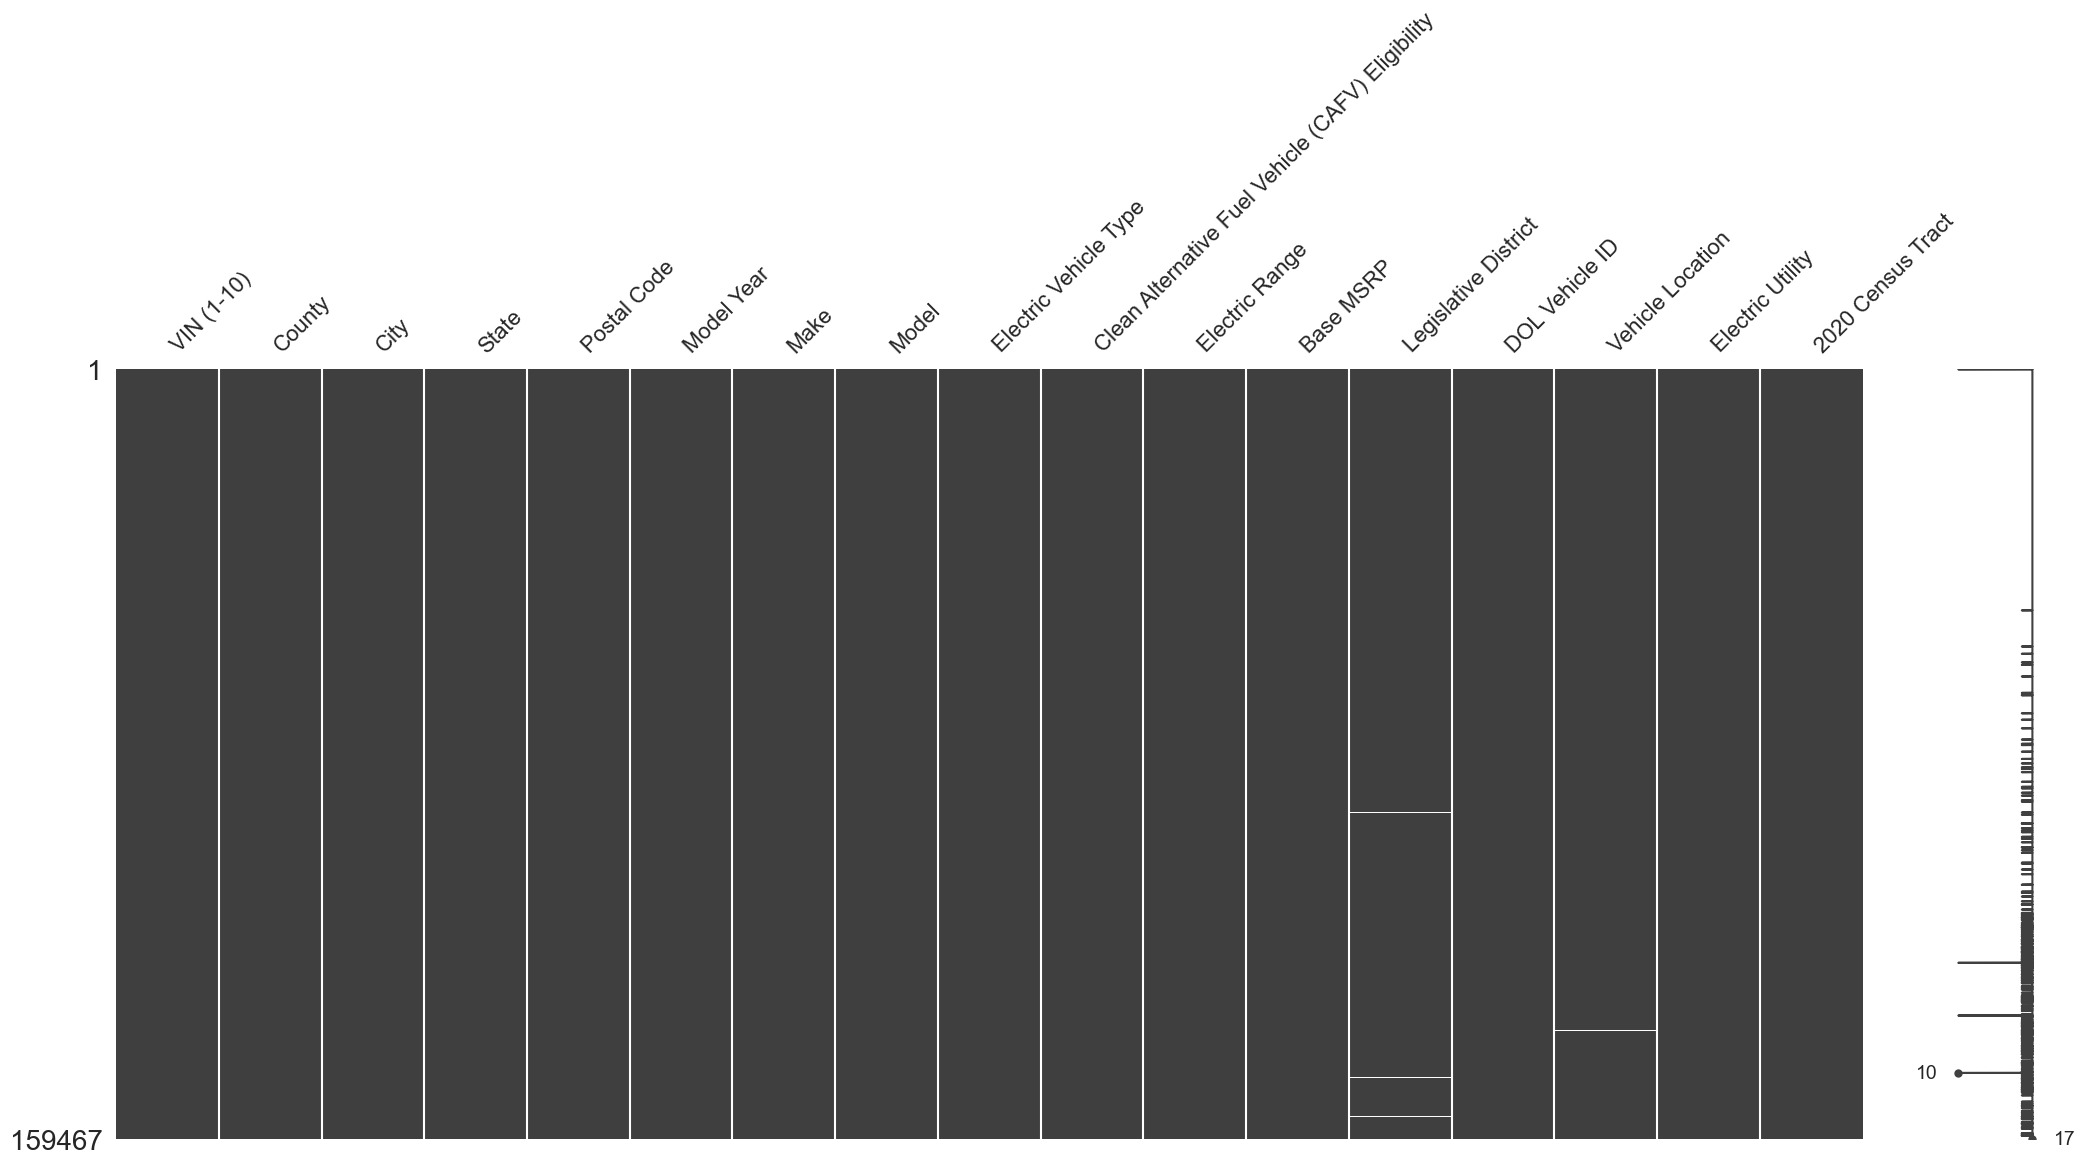

In [66]:
msno.matrix(df);

In [67]:
df = df.dropna() #i will erase 

In [68]:


# Convert the 'Vehicle Location' column to string type
df['Vehicle Location'] = df['Vehicle Location'].astype(str)

# Extract the latitude and longitude from the 'Vehicle Location' column
def extract_coordinates(x, index):
    coords = re.findall(r'-?\d+\.\d+', x)
    if len(coords) >= 2:
        return float(coords[index])
    else:
        return None

df['latitude'] = df['Vehicle Location'].apply(lambda x: extract_coordinates(x, 0))
df['longitude'] = df['Vehicle Location'].apply(lambda x: extract_coordinates(x, 1))

df = df.dropna(subset=['latitude', 'longitude'])



In [69]:
df['Location'] = df['County'] + ', ' + df['City'] + ', ' + df['State']

In [70]:

df['Base MSRP'].value_counts()

Base MSRP
0         155691
69900       1425
31950        391
52900        217
32250        146
54950        129
59900        128
39995        116
36900        101
44100         93
45600         85
64950         84
33950         72
52650         69
34995         64
36800         56
55700         50
53400         36
110950        21
98950         20
81100         20
90700         19
102000        15
75095         12
184400        10
43700         10
109000         6
89100          6
91250          5
32995          3
845000         1
Name: count, dtype: int64

In [71]:
def create_price_range_category(df, column='Base MSRP'):
    def categorize_price(price):
        if price == 0:
            return "Zero"
        elif price < 35000:
            return "Cheap"
        elif price < 55000:
            return "Normal"
        else:
            return "Expensive"

    df['Price_Range_Category'] = df[column].apply(categorize_price)
    return df

df = create_price_range_category(df, column='Base MSRP')

In [72]:
def create_electric_range_category(df, column='Electric Range'):
    def categorize_range(electric_range):
        if electric_range == 0:
            return "Zero"
        elif electric_range < 100:
            return "Short"
        elif electric_range < 250:
            return "Medium"
        else:
            return "Long"

    df['Electric_Range_Category'] = df[column].apply(categorize_range)
    return df

df = create_electric_range_category(df, column='Electric Range')

In [73]:
display(df.head())

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,latitude,longitude,Location,Price_Range_Category,Electric_Range_Category
0,2C4RC1N71H,Kitsap,Bremerton,WA,98311.0,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,23.0,349437882,POINT (-122.6466274 47.6341188),PUGET SOUND ENERGY INC,5.303509e+10,-122.646627,47.634119,"Kitsap, Bremerton, WA",Zero,Short
1,2C4RC1N7XL,Stevens,Colville,WA,99114.0,2020,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,7.0,154690532,POINT (-117.90431 48.547075),AVISTA CORP,5.306595e+10,-117.904310,48.547075,"Stevens, Colville, WA",Zero,Short
2,KNDC3DLCXN,Yakima,Yakima,WA,98908.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,14.0,219969144,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10,-120.602720,46.596562,"Yakima, Yakima, WA",Zero,Zero
3,5YJ3E1EA0J,Kitsap,Bainbridge Island,WA,98110.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,476786887,POINT (-122.5235781 47.6293323),PUGET SOUND ENERGY INC,5.303509e+10,-122.523578,47.629332,"Kitsap, Bainbridge Island, WA",Zero,Medium
4,1N4AZ1CP7J,Thurston,Tumwater,WA,98501.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,35.0,201185253,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10,-122.896920,47.043535,"Thurston, Tumwater, WA",Zero,Medium


In [74]:


def plot_value_counts(df, column, top_n=None):
    # Get the value counts for the specified column
    value_counts = df[column].value_counts()
    
    if top_n:
        value_counts = value_counts.head(top_n)
    
    # Set up the subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, 7))
    
    # Create the pie chart
    value_counts.plot(kind='pie', ax=axes[0], autopct='%.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    axes[0].set_ylabel('')
    axes[0].set_title(f'Percentage of {column}', fontsize=14)
    
    # Create the bar chart
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1], palette='pastel')
    axes[1].set_title(f'Count of {column}', fontsize=14)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Count')
    axes[1].tick_params(axis='x', rotation=30)

    for i, v in enumerate(value_counts.values):
        axes[1].text(i, v + 0.5, str(v), horizontalalignment='center', fontsize=12)
    
    # Set the suptitle for the entire figure
    fig.suptitle(f'{column} Distribution', fontsize=18, y=1.03)
    
    # Show the plots
    plt.show()

def plot_coordinates_seaborn(df, cmap_column=None, top_n=None, figsize=(15, 10)):
    # Drop duplicate latitude and longitude pairs
    unique_coordinates = df[['latitude', 'longitude']].drop_duplicates()

    if cmap_column and top_n:
        # Include the cmap_column in the unique_coordinates DataFrame
        unique_coordinates[cmap_column] = df[cmap_column]

        # Get the top N most frequent categories in the specified column
        top_categories = unique_coordinates[cmap_column].value_counts().head(top_n).index.tolist()

        # Filter the unique_coordinates DataFrame to keep only the top N categories
        filtered_coordinates = unique_coordinates[unique_coordinates[cmap_column].isin(top_categories)]

        # Create a scatter plot using Seaborn with hue parameter
        plt.figure(figsize=figsize)
        sns.scatterplot(data=filtered_coordinates, x='longitude', y='latitude', hue=cmap_column, palette='viridis', edgecolor=None, s=50)
        plt.title(f'Latitude and Longitude Points (Top {top_n} {cmap_column})')
    else:
        # Create a scatter plot using Seaborn without hue parameter
        plt.figure(figsize=figsize)
        sns.scatterplot(data=unique_coordinates, x='longitude', y='latitude', color='darkcyan', edgecolor=None, s=50)
        plt.title('Latitude and Longitude Points')

    # Show the plot
    plt.show()



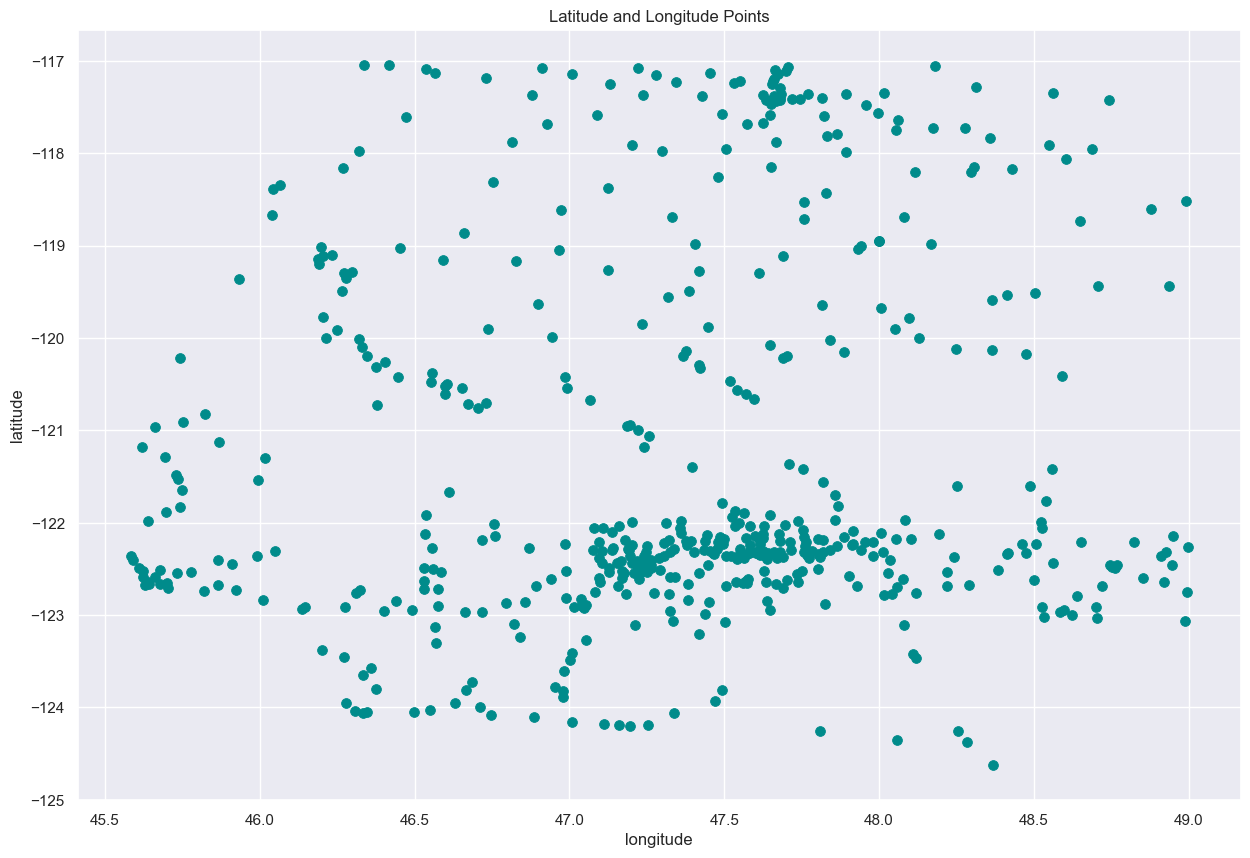

In [75]:
plot_coordinates_seaborn(df)

C:\Users\pclenovo\AppData\Local\Temp\ipykernel_8988\3765881980.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1], palette='pastel')


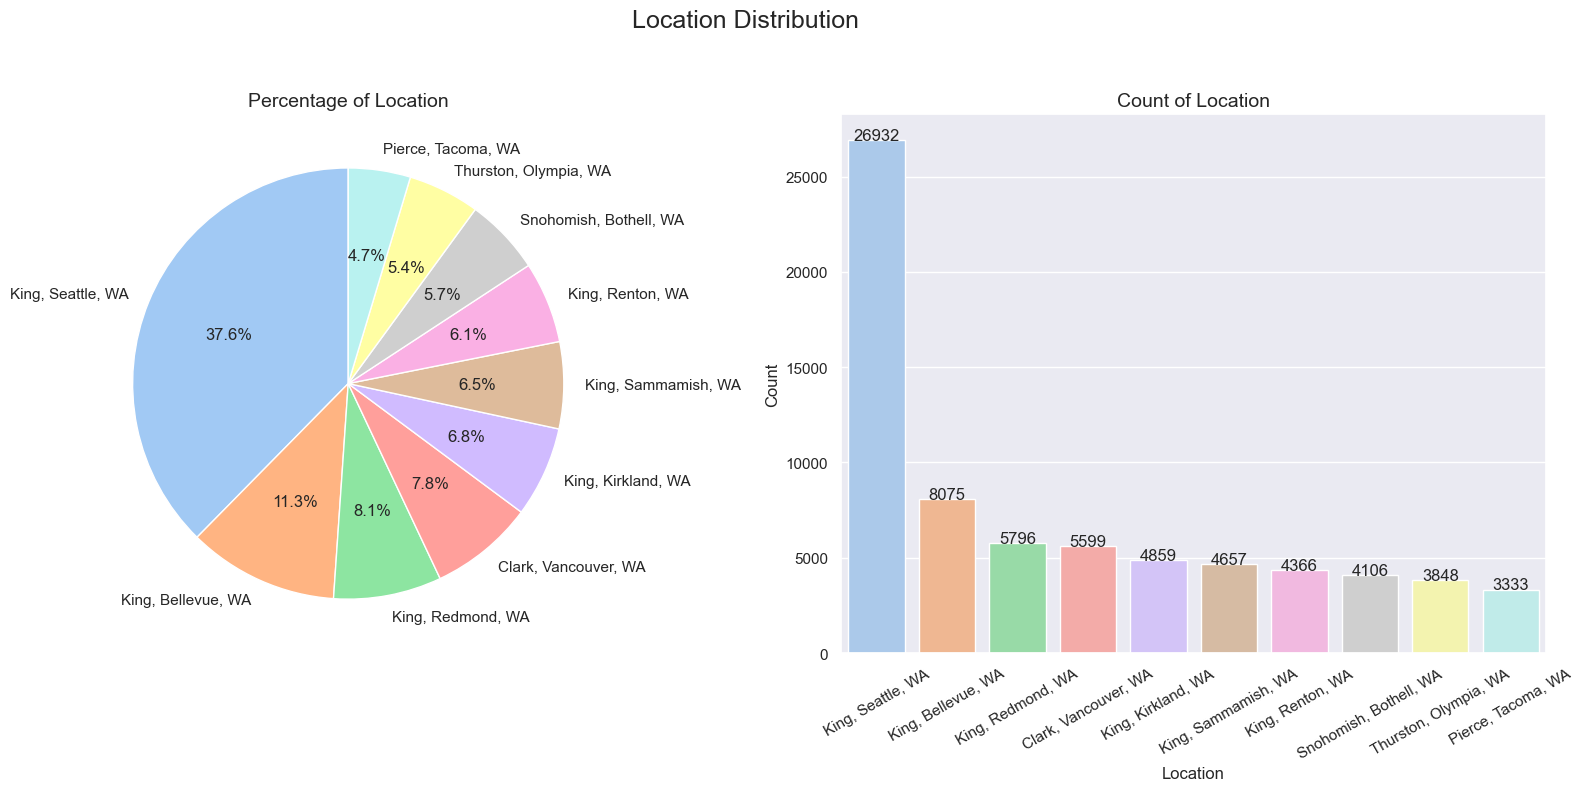

In [76]:

plot_value_counts(df, 'Location', top_n=10)

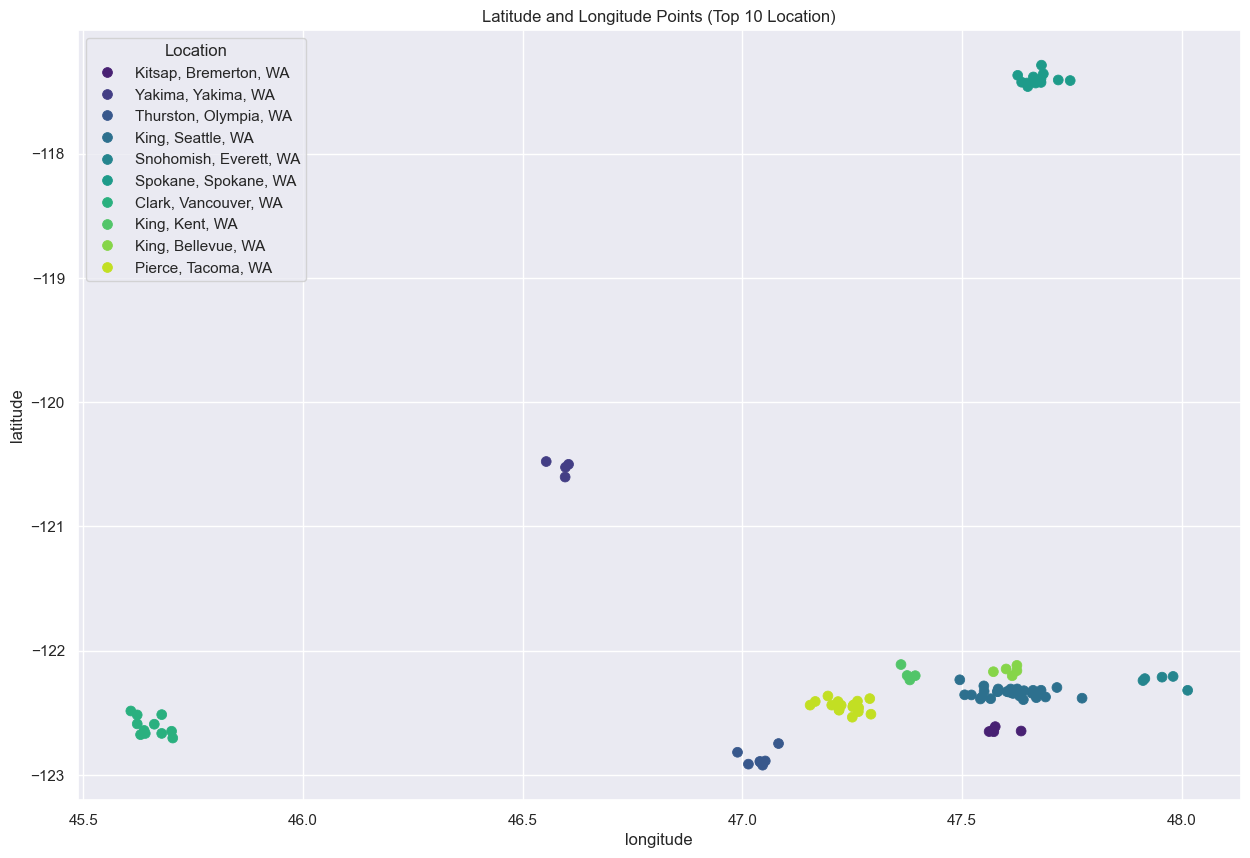

In [77]:

plot_coordinates_seaborn(df, cmap_column='Location', top_n=10) 

C:\Users\pclenovo\AppData\Local\Temp\ipykernel_8988\3765881980.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1], palette='pastel')


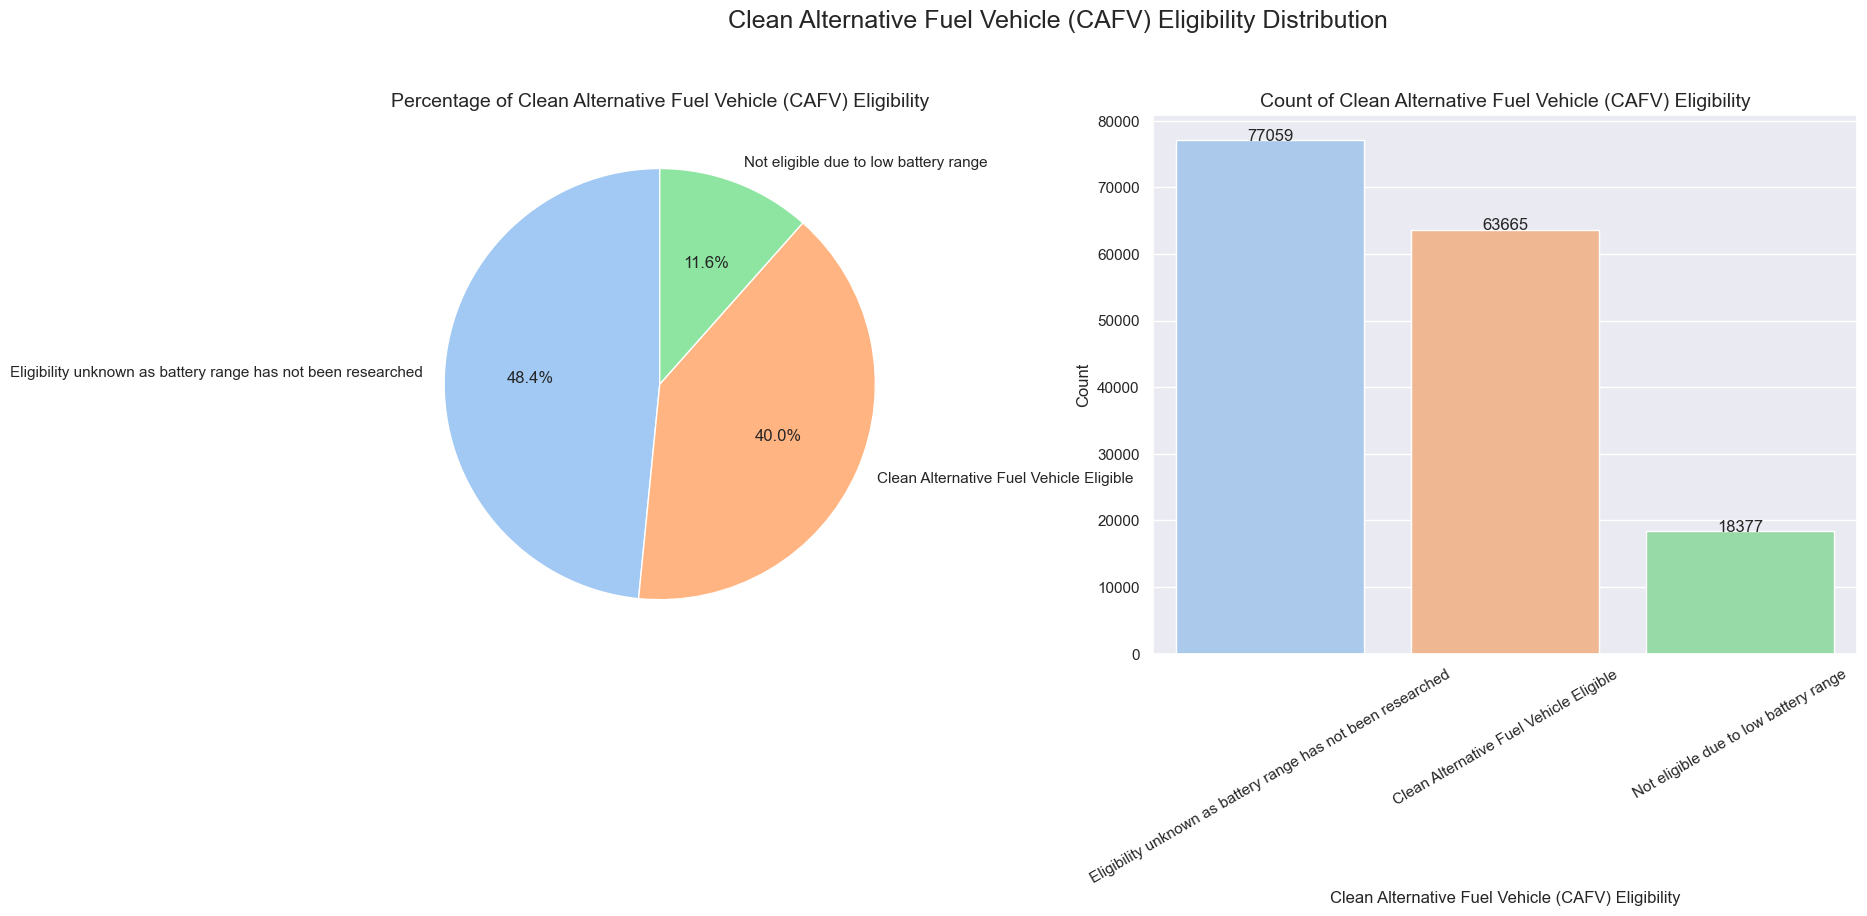

In [79]:
plot_value_counts(df, 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', top_n=3)

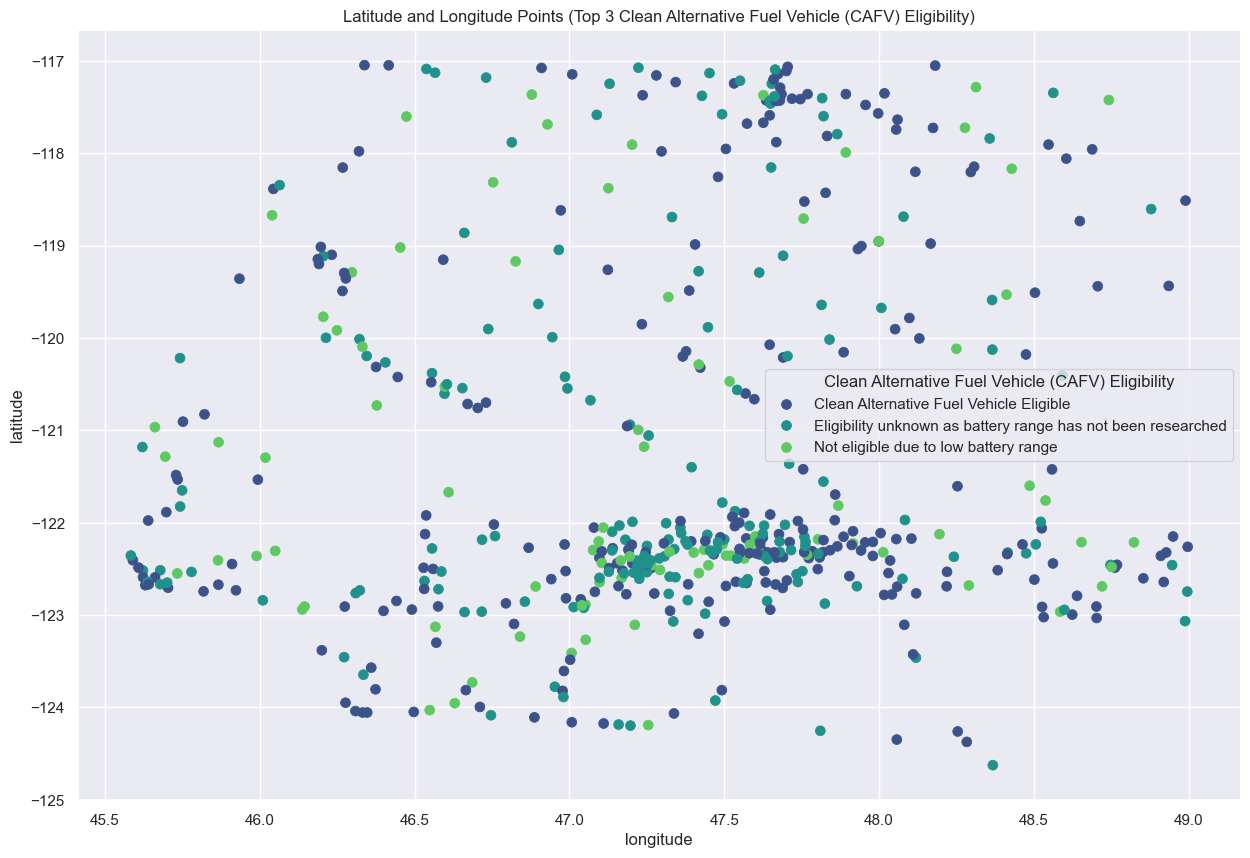

In [80]:

plot_coordinates_seaborn(df, cmap_column='Clean Alternative Fuel Vehicle (CAFV) Eligibility', top_n=3) 

C:\Users\pclenovo\AppData\Local\Temp\ipykernel_8988\3765881980.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1], palette='pastel')


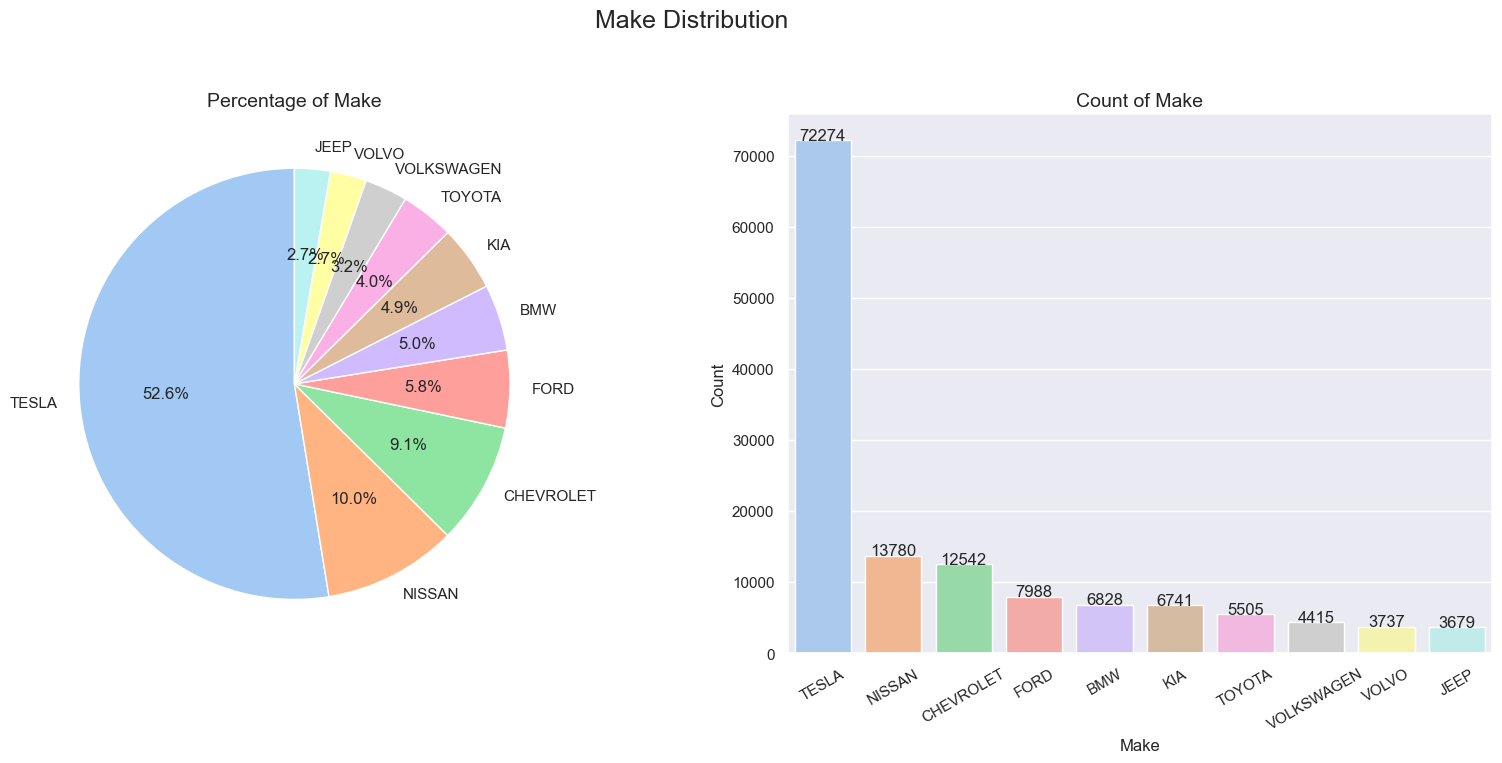

In [81]:

plot_value_counts(df, 'Make', top_n=10)

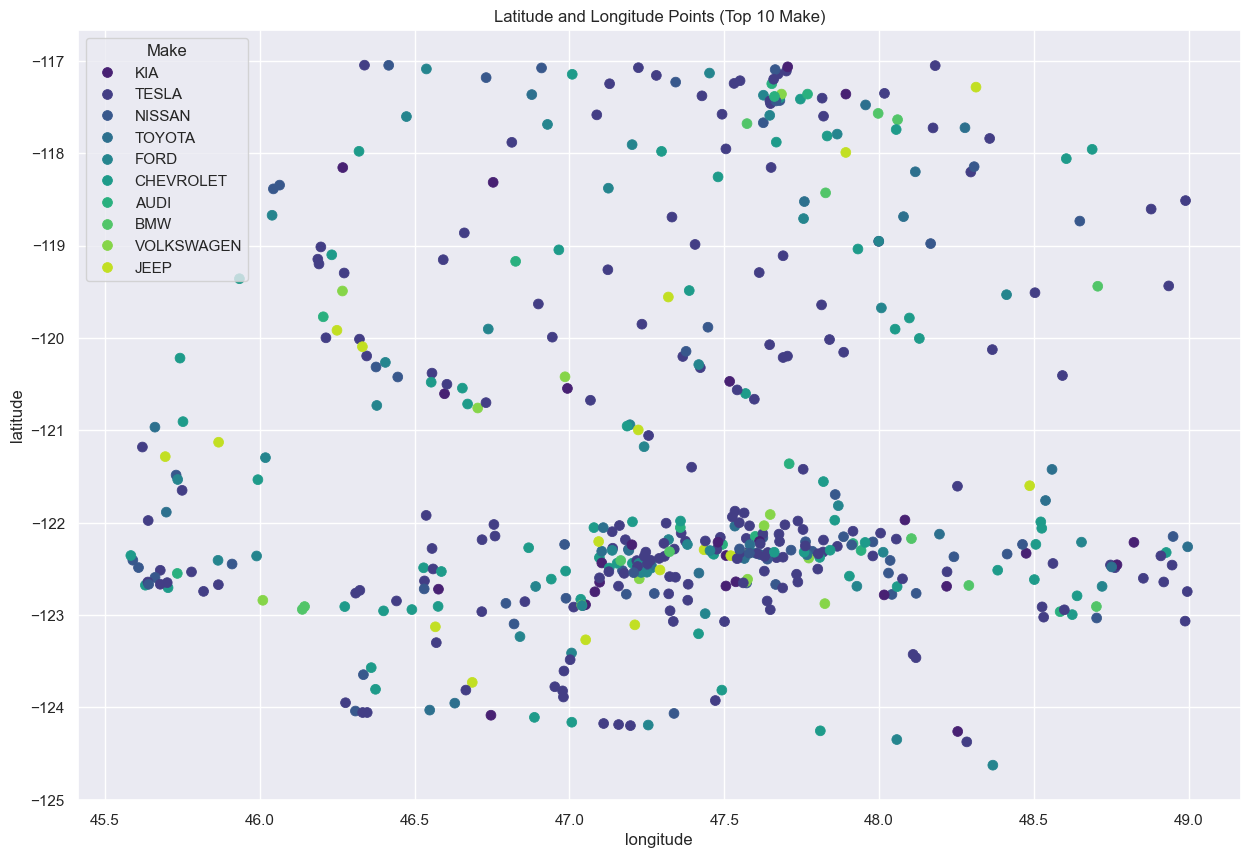

In [82]:

plot_coordinates_seaborn(df, cmap_column='Make', top_n=10) 

C:\Users\pclenovo\AppData\Local\Temp\ipykernel_8988\3765881980.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1], palette='pastel')


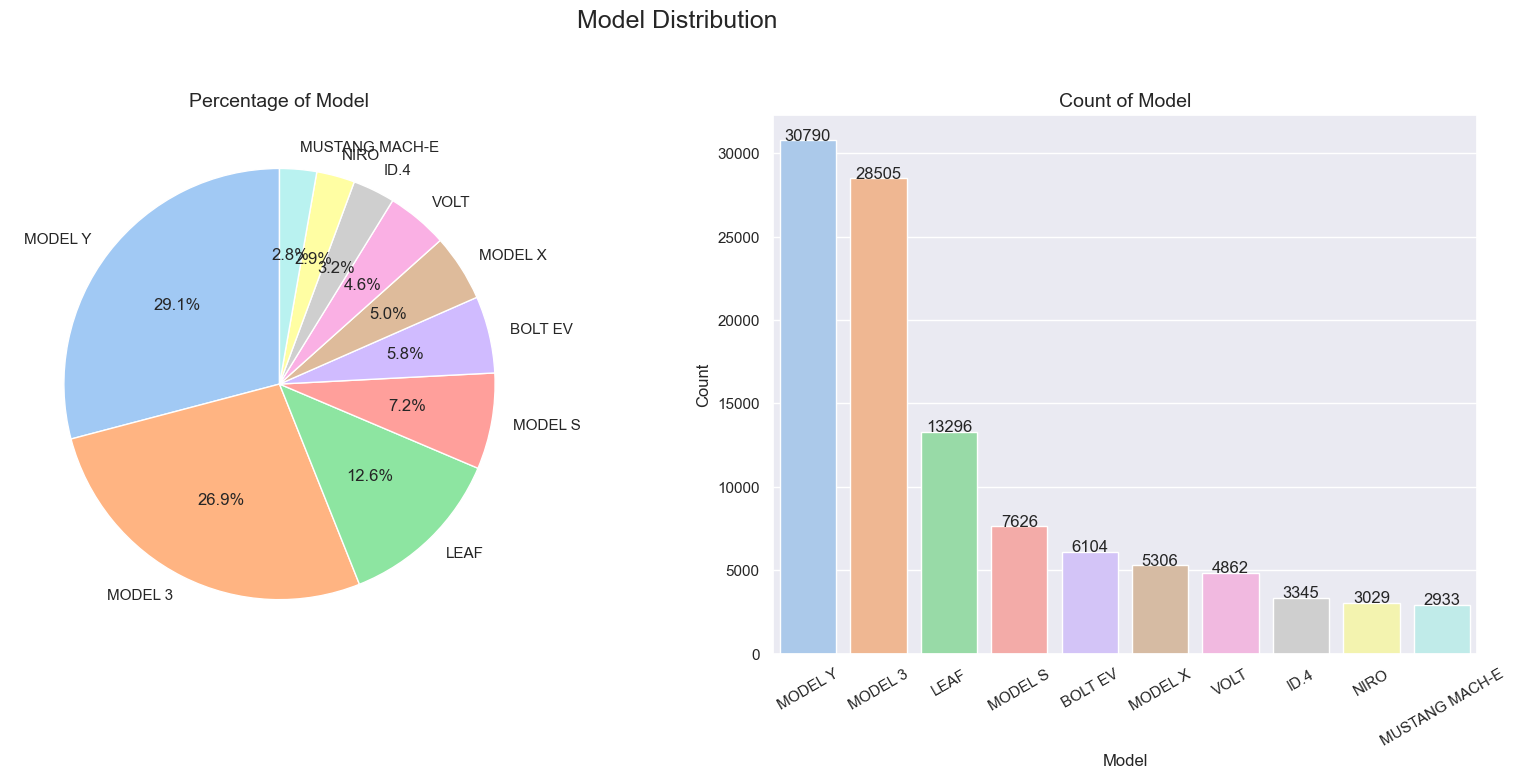

In [83]:

plot_value_counts(df, 'Model', top_n=10)

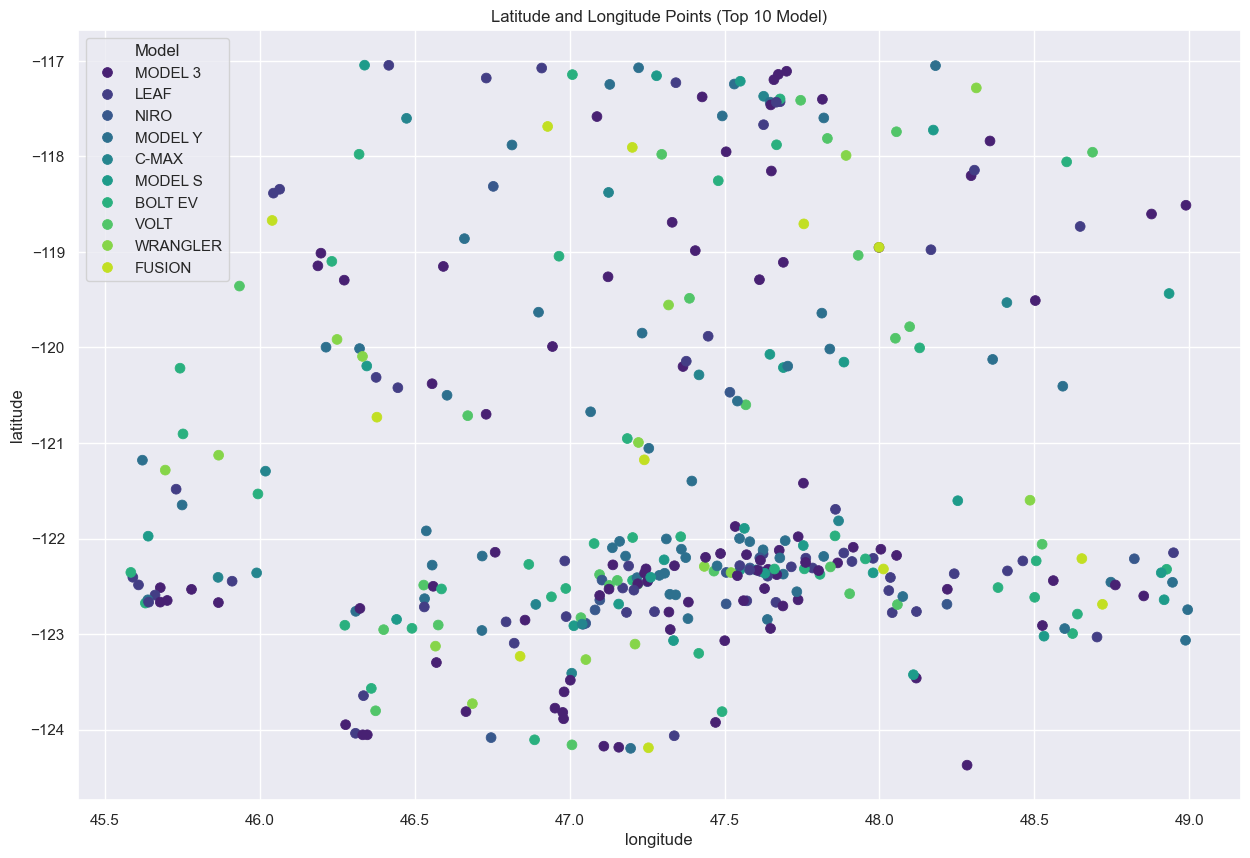

In [84]:

plot_coordinates_seaborn(df, cmap_column='Model', top_n=10) 

C:\Users\pclenovo\AppData\Local\Temp\ipykernel_8988\3765881980.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1], palette='pastel')


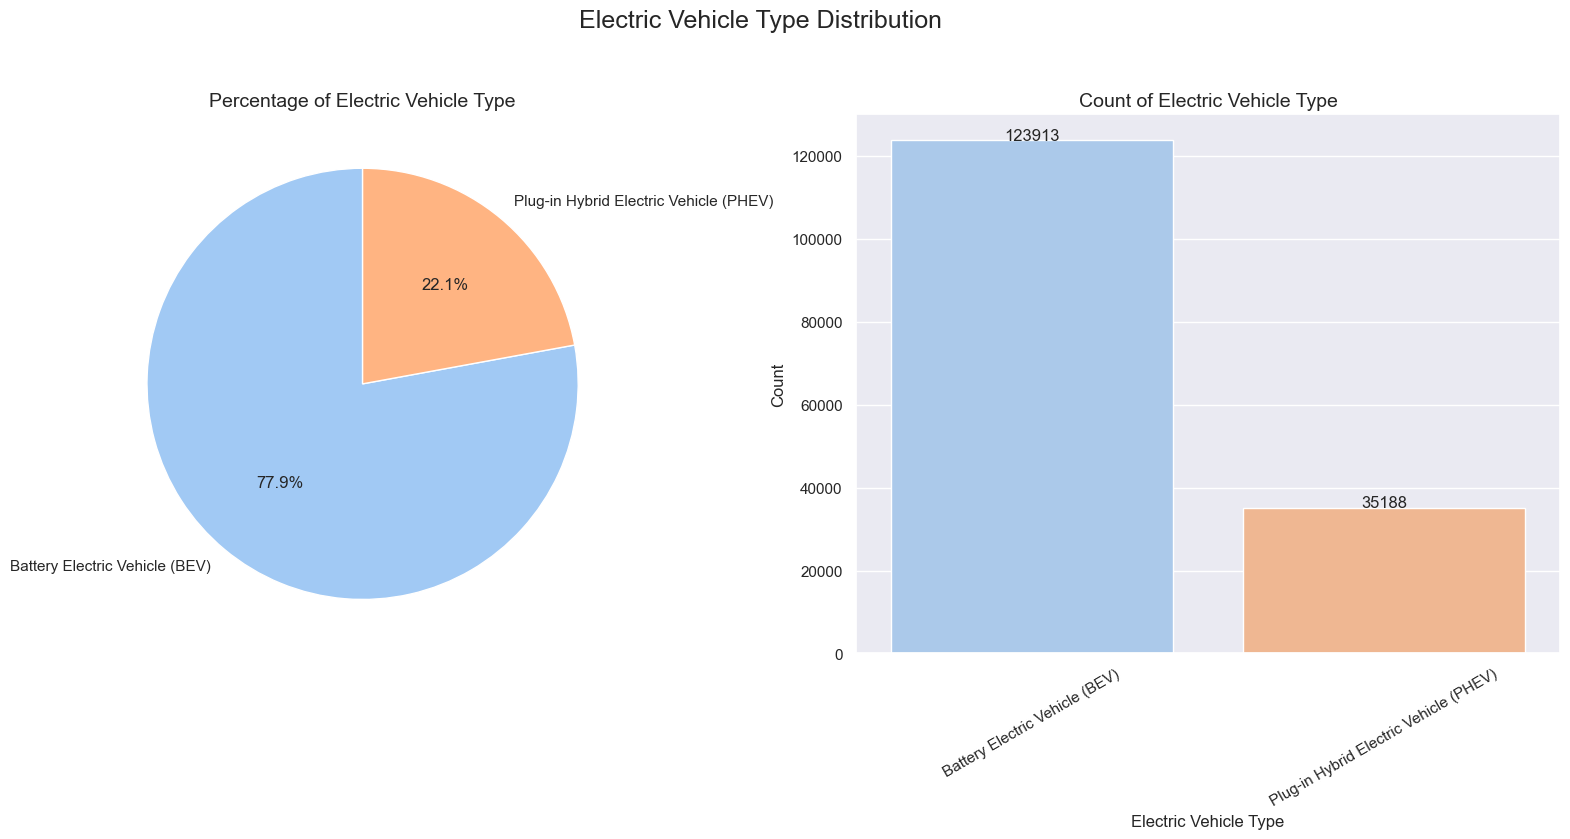

In [85]:

plot_value_counts(df, 'Electric Vehicle Type', top_n=2)

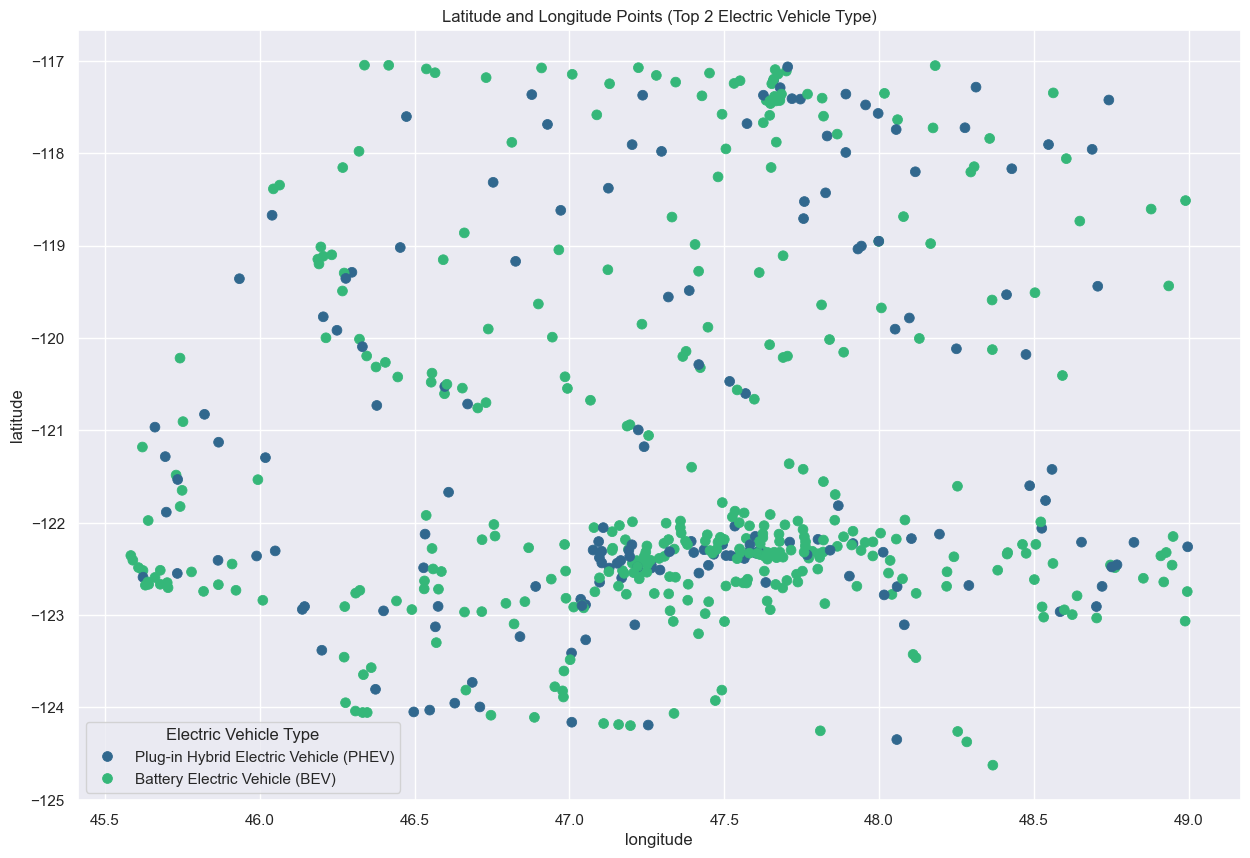

In [86]:
plot_coordinates_seaborn(df, cmap_column='Electric Vehicle Type', top_n=2) 

C:\Users\pclenovo\AppData\Local\Temp\ipykernel_8988\3765881980.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1], palette='pastel')


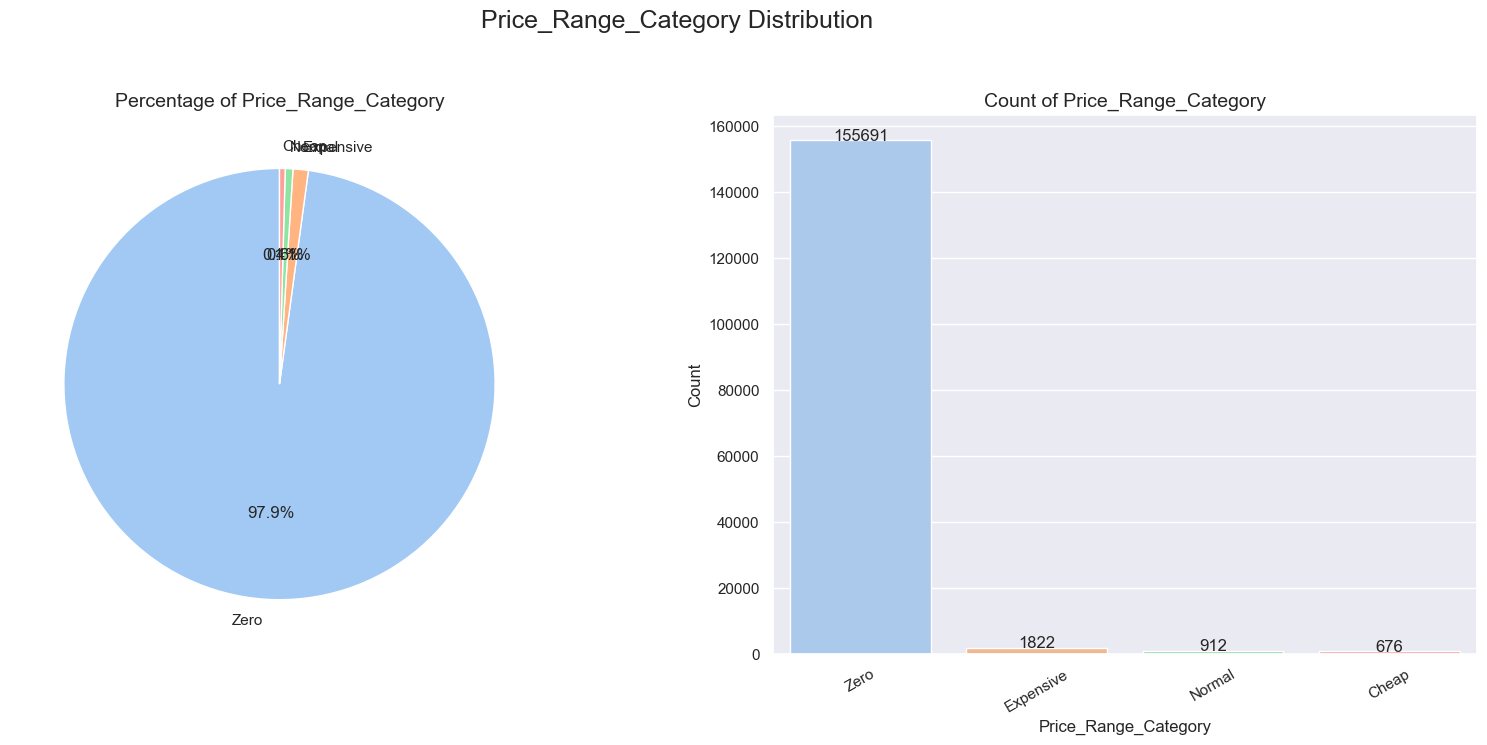

In [87]:

plot_value_counts(df, 'Price_Range_Category', top_n=4)

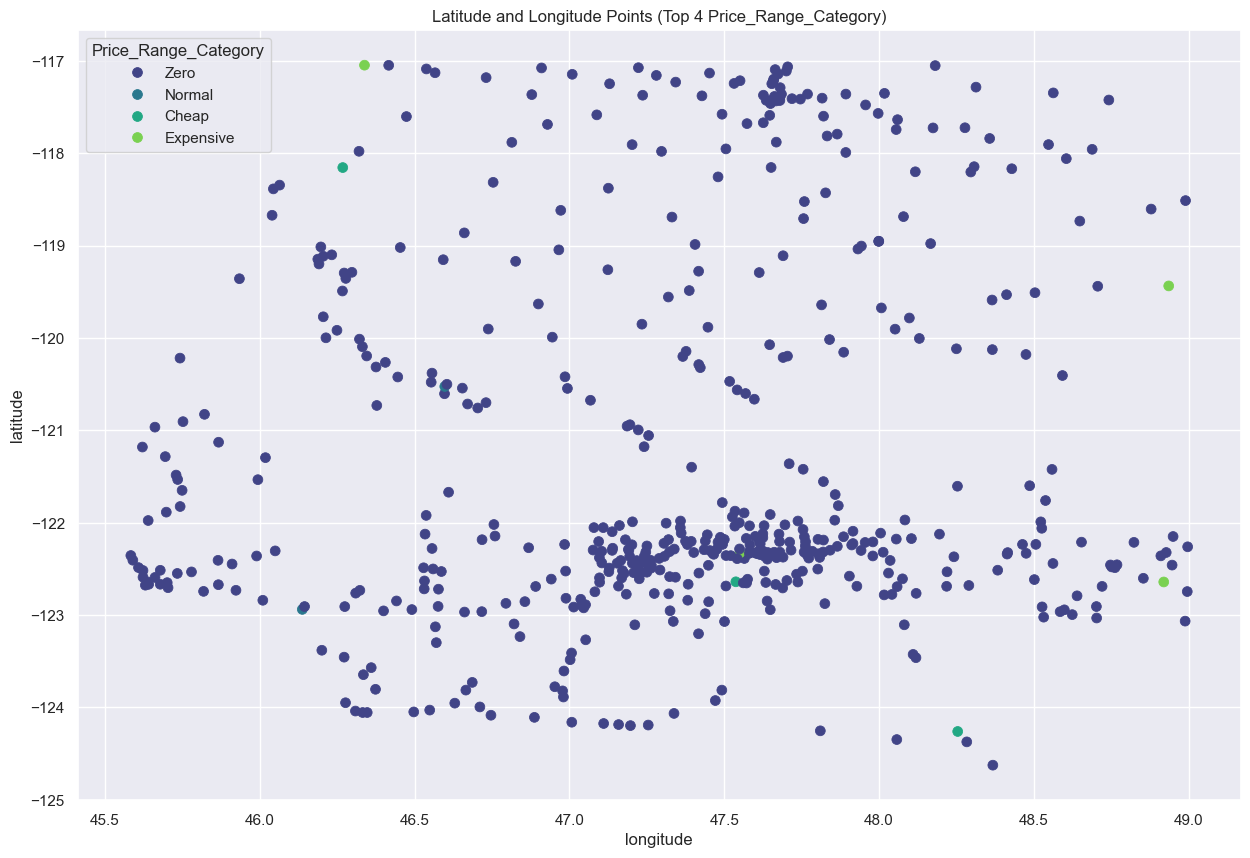

In [88]:
plot_coordinates_seaborn(df, cmap_column='Price_Range_Category', top_n=4) 

C:\Users\pclenovo\AppData\Local\Temp\ipykernel_8988\3765881980.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1], palette='pastel')


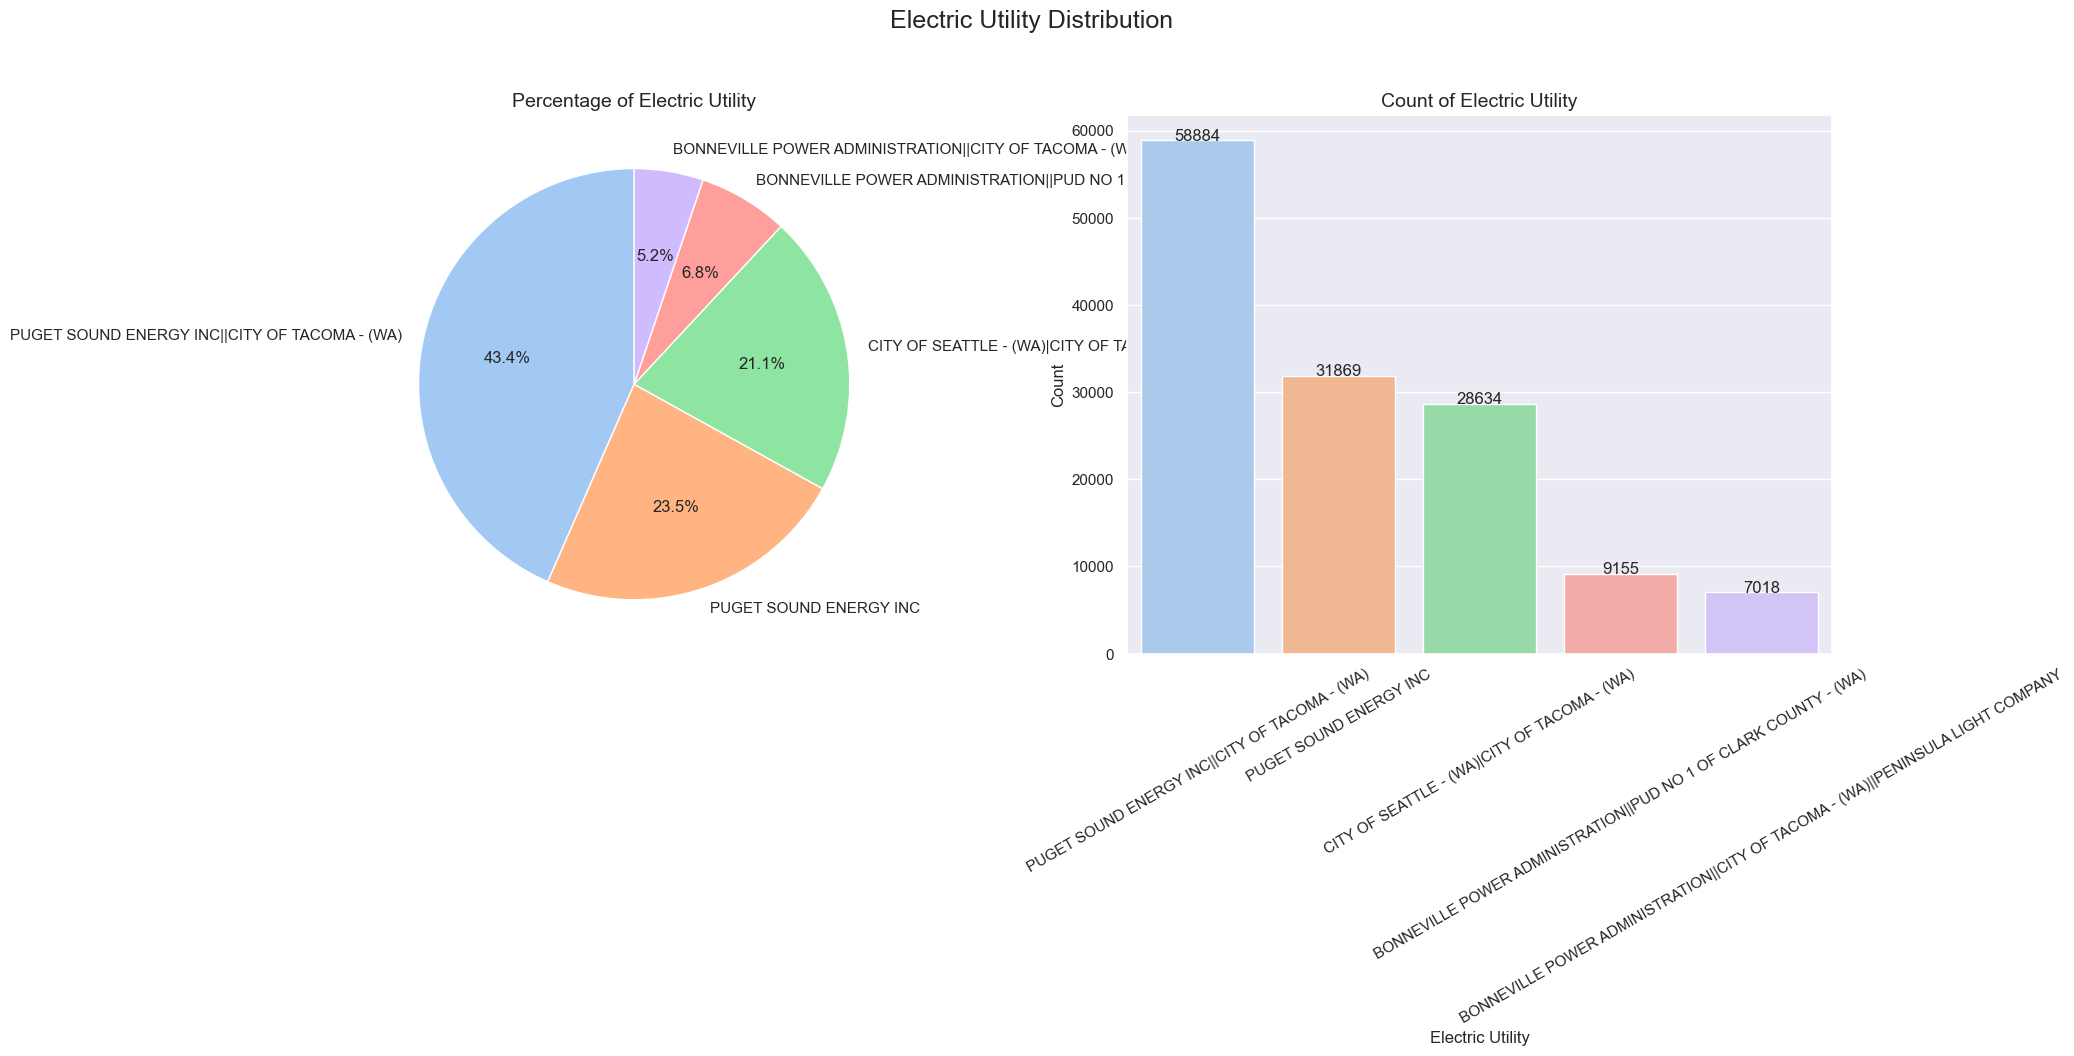

In [89]:

plot_value_counts(df, 'Electric Utility', top_n=5)

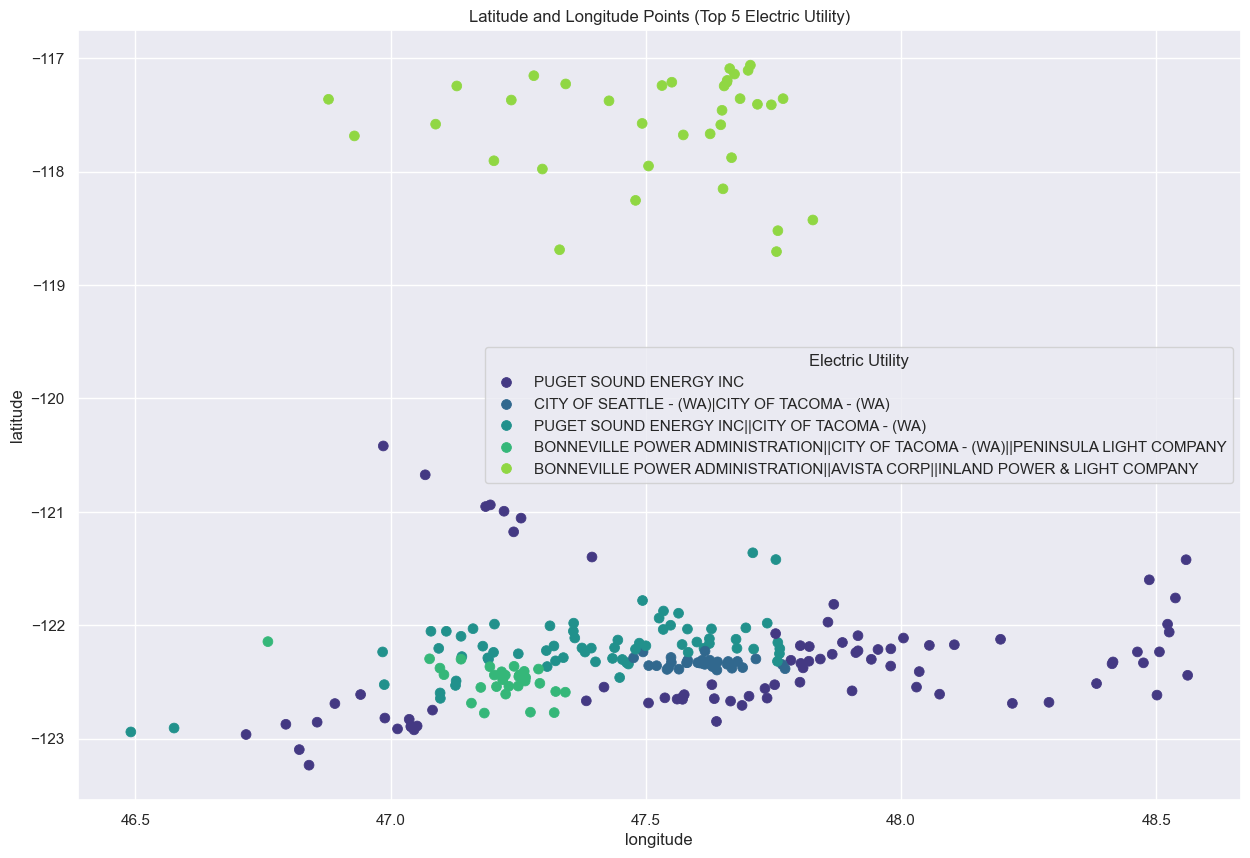

In [90]:
plot_coordinates_seaborn(df, cmap_column='Electric Utility', top_n=5)